# Задание 2

В <a href="https://stepik.org/lesson/196432/step/14">задании на исследование пересечений графиков функций с помощью matplotlib</a> мы изучали пару интересных функций:

$ f(x) = sin(\frac{x}{5}) \cdot e^{\frac{x}{10}} + 5 \cdot e^{-\frac{x}{2}}$

и

$g(x) = 1 - x^3 + x^5$

Теперь у нас есть более удобный инструмент, позволяющий работать с графиками интерактивно, менять масштаб, двигать, не перестраивая результат ячейки, поэтому имеет смысл к ним вернуться.

Не все заметили (и это было не страшно), что эти 2 функции имеют бесконечно много точек пересечений.

В этом задании необходимо построить 1 фигуру, содержащую несколько изображений. В результате должна получиться 1 фигура следующего вида:

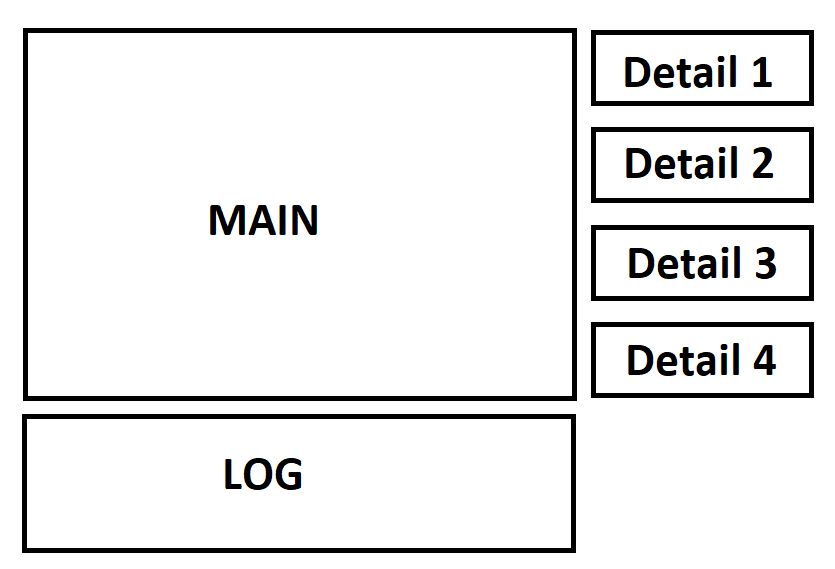

Во всех областях должны быть показаны по 2 графика (f(x) и g(x)). 

Отличаться будет масштаб осей и интервал аргументов и функций, которые выводятся.

- MAIN - основное изображение - линейный масштаб, x в интервале от 0 до 500

- LOG - логарифмический масштаб вдоль оси Y. X в интервале от 0 до 500

- Detail (1-4) - 4 графика с линейным масштабом и таким интервалом x и y, чтобы было видно хотя бы по 1 точке пересечения

Таким образом, мы эмулируем ситуацию одного большого окна для детального просмотра, одного вспомогательного окна с изменённым масштабом и нескольких окон, акцентирующих внимание на важных деталях. При этом, если вы используете достаточно много точек в основном масштабе, то в интервактивном режиме вы можете приблизить какой-то интервал, соответсвующий, например, окнам detail и убедиться, что графики действительно пересекаются.

Убедитесь, что на всех фигурах кривые, соответсвующие одной функции выводятся одним цветом.

Легенду и подписи выводить не обязательно.

Рекомендуется изменить отступ от краёв фигуры и, возможно, размер самой фигуры.

*Примечание. Чтобы задать логарифмический масштаб используйте атрибут <code>type="log"</code> метода update_yaxes, не забыв применить его к конкретной ячейке фигуры с графиком.*

In [6]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

In [7]:
def f(x):
    return np.sin(5*x) * np.exp(10*x) + 5*np.exp(-2*x)

def g(x):
    return 1 - x**3 + x**5

x = np.linspace(-10, 10, 221)


In [8]:
fig = make_subplots(rows=2, cols=2, 
                    specs=[[{"type": "scatter"}]*2]*2,
                    subplot_titles=("MAIN", "DETAIL 1", "LOG", "DETAIL 2"))



In [9]:
x_intersect = np.roots(f(x)-g(x)) # Значения x, в которые f(x) == g(x)

# Создадим кортежи с левыми и правыми границами интервалов смены логики пересечений
change_points = [(0, x_intersect[0]), (x_intersect[0], x_intersect[1]), 
                 (x_intersect[1], x_intersect[2]), (x_intersect[2], 500)]

# Определим функцию для определенного интервала
def f_segment(x, segment):
    return f(x) if (x > segment[0] and x < segment[1]) else None

def g_segment(x, segment):
    return g(x) if (x > segment[0] and x < segment[1]) else None

# Зададим интервалы для DETAIL 1 и DETAIL 2
xlim_1 = change_points[1]
xlim_2 = change_points[3]
ymax = max(np.max(f(xlim_1)), np.max(g(xlim_1)), np.max(f(xlim_2)), np.max(g(xlim_2)))
ymin = min(np.min(f(xlim_1)), np.min(g(xlim_1)), np.min(f(xlim_2)), np.min(g(xlim_2)))
ylim_1 = (ymin - 0.1*abs(ymin), ymax + 0.1*abs(ymax))
ylim_2 = ylim_1

ValueError: operands could not be broadcast together with shapes (10,) (20,) 

In [ ]:
x = np.linspace(0, 500, 201)

fig.add_trace(
    go.Scatter(x=x, y=f(x), name="f(x)", line=dict(color='red')),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=g(x), name="g(x)", line=dict(color='blue')),
    row=1, col=1
)

fig.update_xaxes(title_text="x", row=1, col=1)
fig.update_yaxes(title_text="y", row=1, col=1)

fig.add_trace(
    go.Scatter(x=x, y=f(x), name="f(x)", line=dict(color='red')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=g(x), name="g(x)", line=dict(color='blue')),
    row=2, col=1
)

fig.update_xaxes(title_text="x", row=2, col=1)
fig.update_yaxes(title_text="y (log scale)", type="log", row=2, col=1)

fig.add_trace(
    go.Scatter(x=x, y=f_segment(x, xlim_1), name="f(x)", line=dict(color='red')),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=x, y=g_segment(x, xlim_1), name="g(x)", line=dict(color='blue')),
    row=2, col=1
)
fig.update_xaxes(title_text="x", range=xlim_1, row=2, col=1)
fig.update_yaxes(title_text="y", range=ylim_1, row=2, col=1)


fig.add_trace(
    go.Scatter(x=x, y=f_segment(x, xlim_2), name="f(x)", line=dict(color='red')),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=x, y=g_segment(x, xlim_2), name="g(x)", line=dict(color='blue')),
    row=2, col=2
)
fig.update_xaxes(title_text="x", range=xlim_2, row=2, col=2)
fig.update_yaxes(title_text="y", range=ylim_2, row=2, col=2)


fig.show()
